## ESTUDO PARA SENTIMENTO DE FUNCIONARIOS DENTRO DE UMA EMPRESA
### SE VÃO PEDIR DEMISSÃO OU PERMANECER NA EMPRESA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
db_funcionarios = pd.read_csv("Employee-Attrition.csv")

In [5]:
db_funcionarios.shape

(1470, 35)

In [6]:
db_funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# COnferir se tem informações faltando dentro da tabela
db_funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Comando para ver as metricas dentro da tabela
# tais como: méda, maximo, minino, quartis ...
db_funcionarios.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Visualizando as informações dos Dados

In [9]:
# Transformando dados em formato 'String' para formato 'Int'
db_funcionarios['Attrition'] = db_funcionarios['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
db_funcionarios['OverTime'] = db_funcionarios['OverTime'].apply(lambda x: 1 if x == "Yes" else 0)
db_funcionarios['Over18'] = db_funcionarios['Over18'].apply(lambda x: 1 if x == "Yes" else 0)

In [11]:
db_funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
# Comando para mostrar todas as Colunas da tabela
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [13]:
db_funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


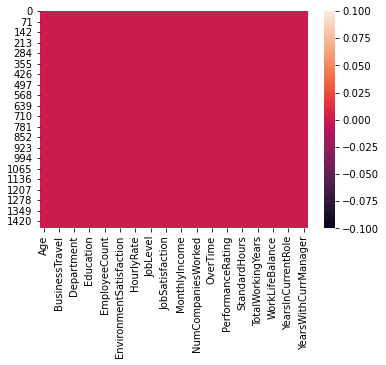

In [14]:
# obs: se utilizar o ; no final não exibe as msg do matplotlib
# Se a saida do mapa de calor for com 1 cor somente, mostra que não tem valores nulos
sns.heatmap(db_funcionarios.isnull());

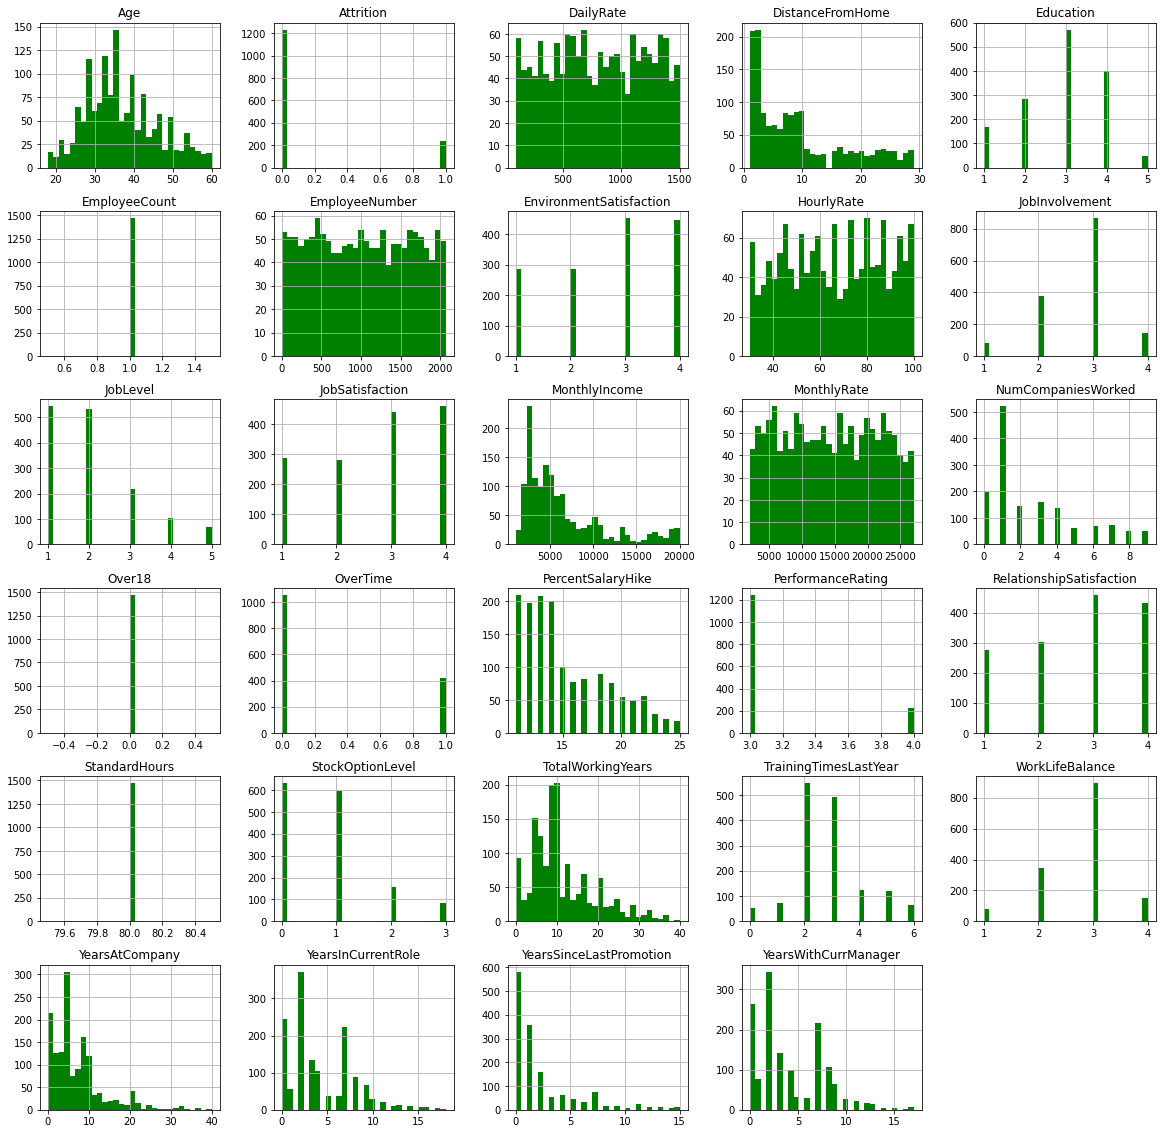

In [15]:
db_funcionarios.hist(bins = 30, figsize = (20,20), color = 'g');

In [16]:
# Alguns campos não são nescessários para o tratamento, então vamos apaga-los
db_funcionarios.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [17]:
# Conferindo a nova tabela
db_funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [18]:
db_funcionarios.shape

(1470, 31)

In [19]:
# Criando 2 novos data frames a partir da tabela inicial
# 1 para as pessoas que saíram da empresa e outro para os que não saíram da empresa 


In [20]:
db_sairam = db_funcionarios[db_funcionarios['Attrition'] == 1]
db_ficaram = db_funcionarios[db_funcionarios['Attrition'] == 0]

In [21]:
print("total = ", len(db_funcionarios))
print('Número de funcionários que saíram da empresa = ', len(db_sairam))
print('Porcentagem de funcionários que saíram da empresa = ', (len(db_sairam) / len(db_funcionarios)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(db_ficaram))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(db_ficaram) / len(db_funcionarios)) * 100)

total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [22]:
db_sairam.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [23]:
db_ficaram.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


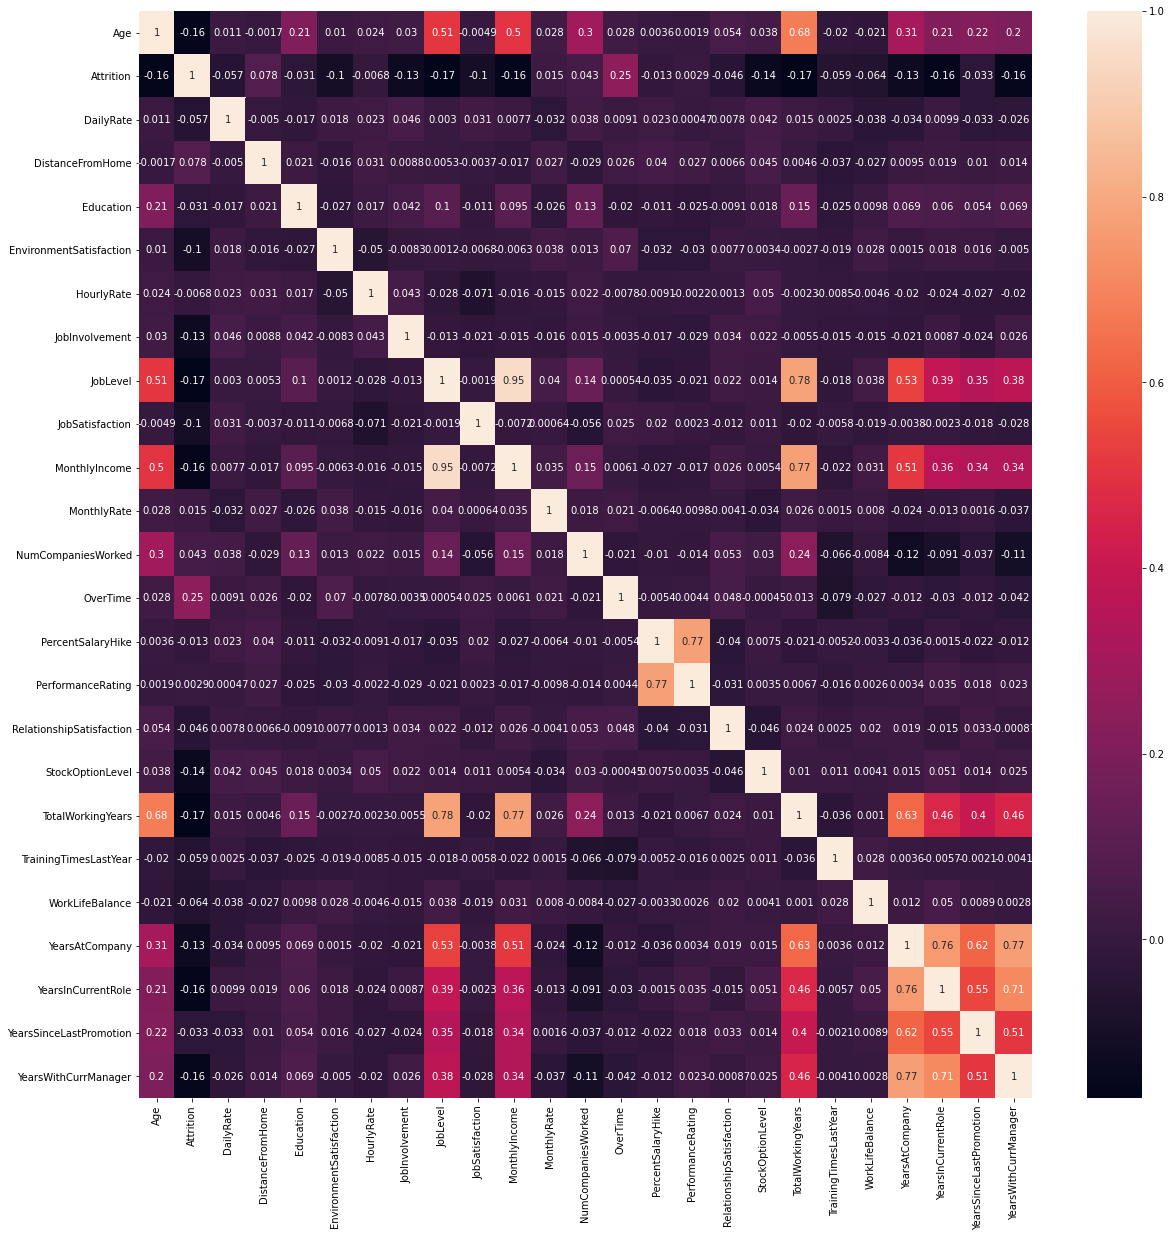

In [24]:
# Fazendo as correlações entre todas as caracteristicas dos funcionarios, para saber
# quais são mais provável sairem
# usando o mapa de calor
correalcao = db_funcionarios.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correalcao, annot = True);

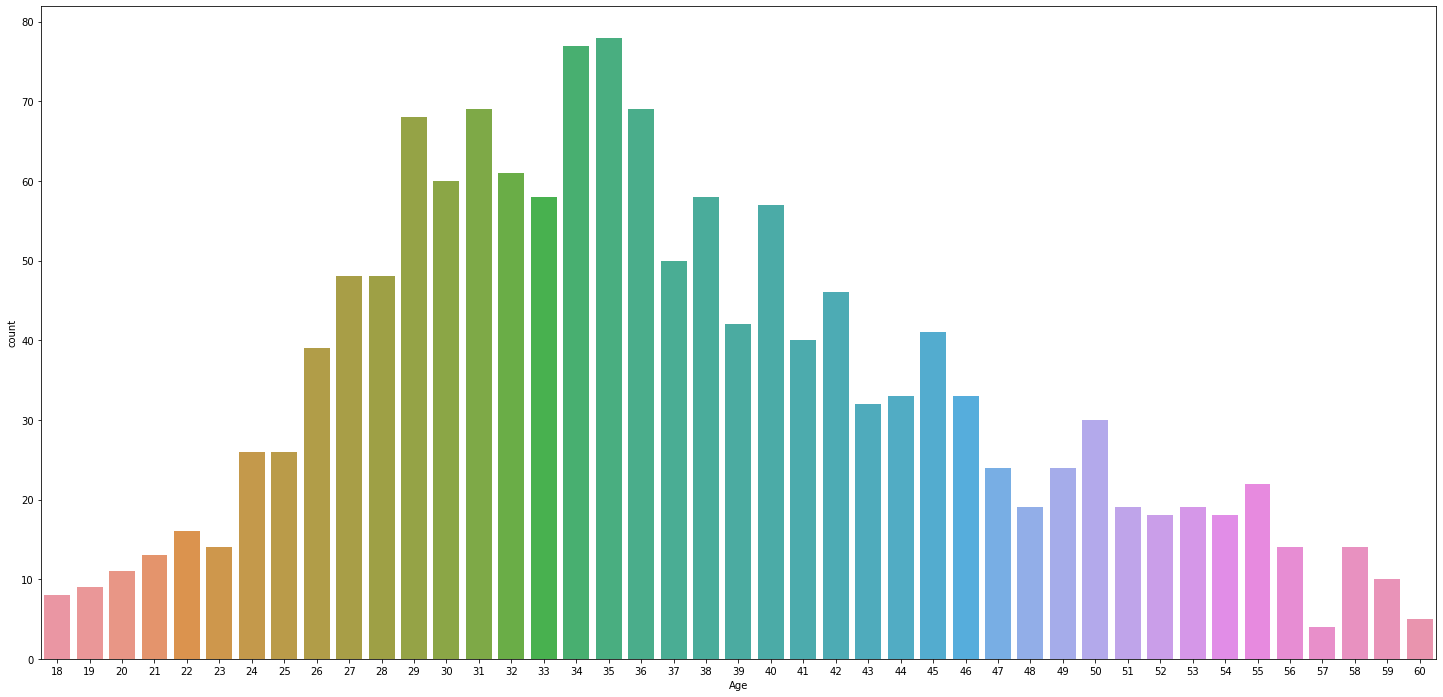

In [25]:
# Imprimindo um grafico com a relação da idade com o "sentimento de saída"
plt.figure(figsize = [25,12])
sns.countplot(x = 'Age', data = db_funcionarios);

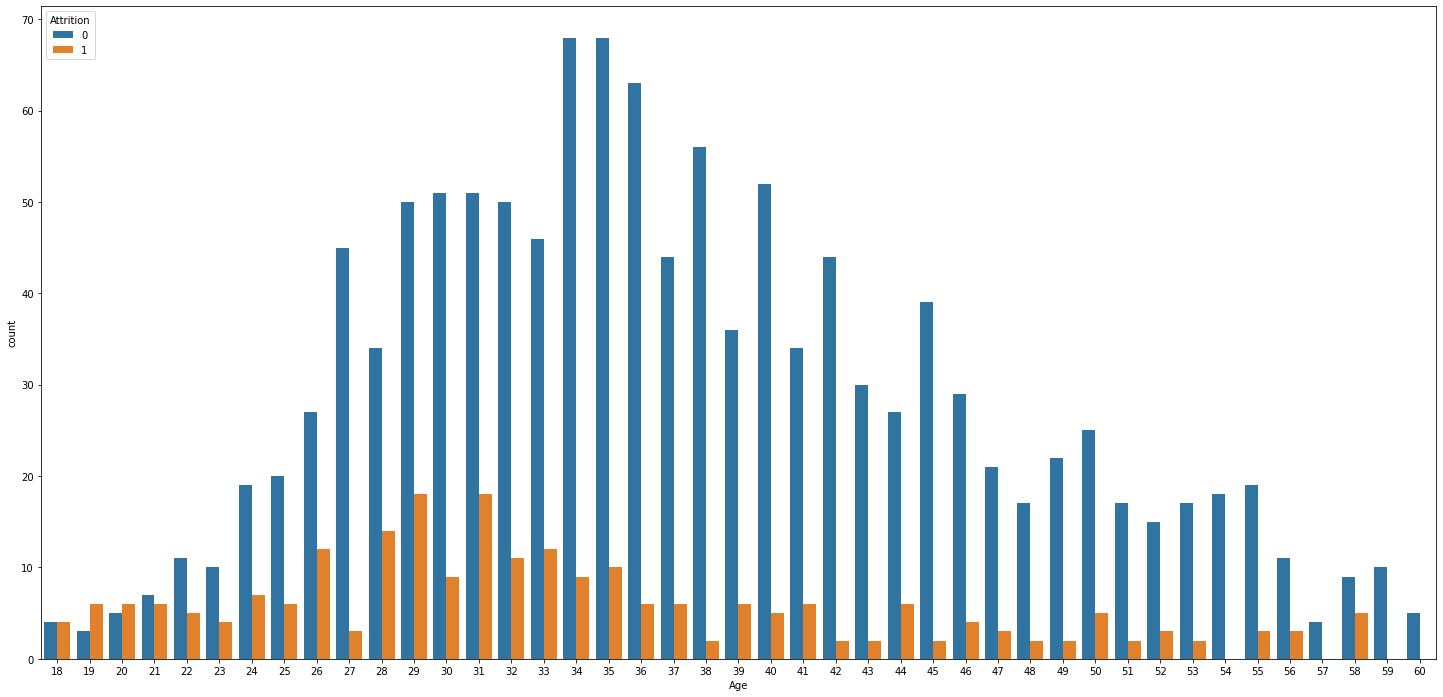

In [26]:
# Imprimindo um grafico com a relação da idade com o "sentimento de saída"
# Temos um agrupamento com as pessoas que podem/não saírem da empres
plt.figure(figsize = [25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = db_funcionarios);

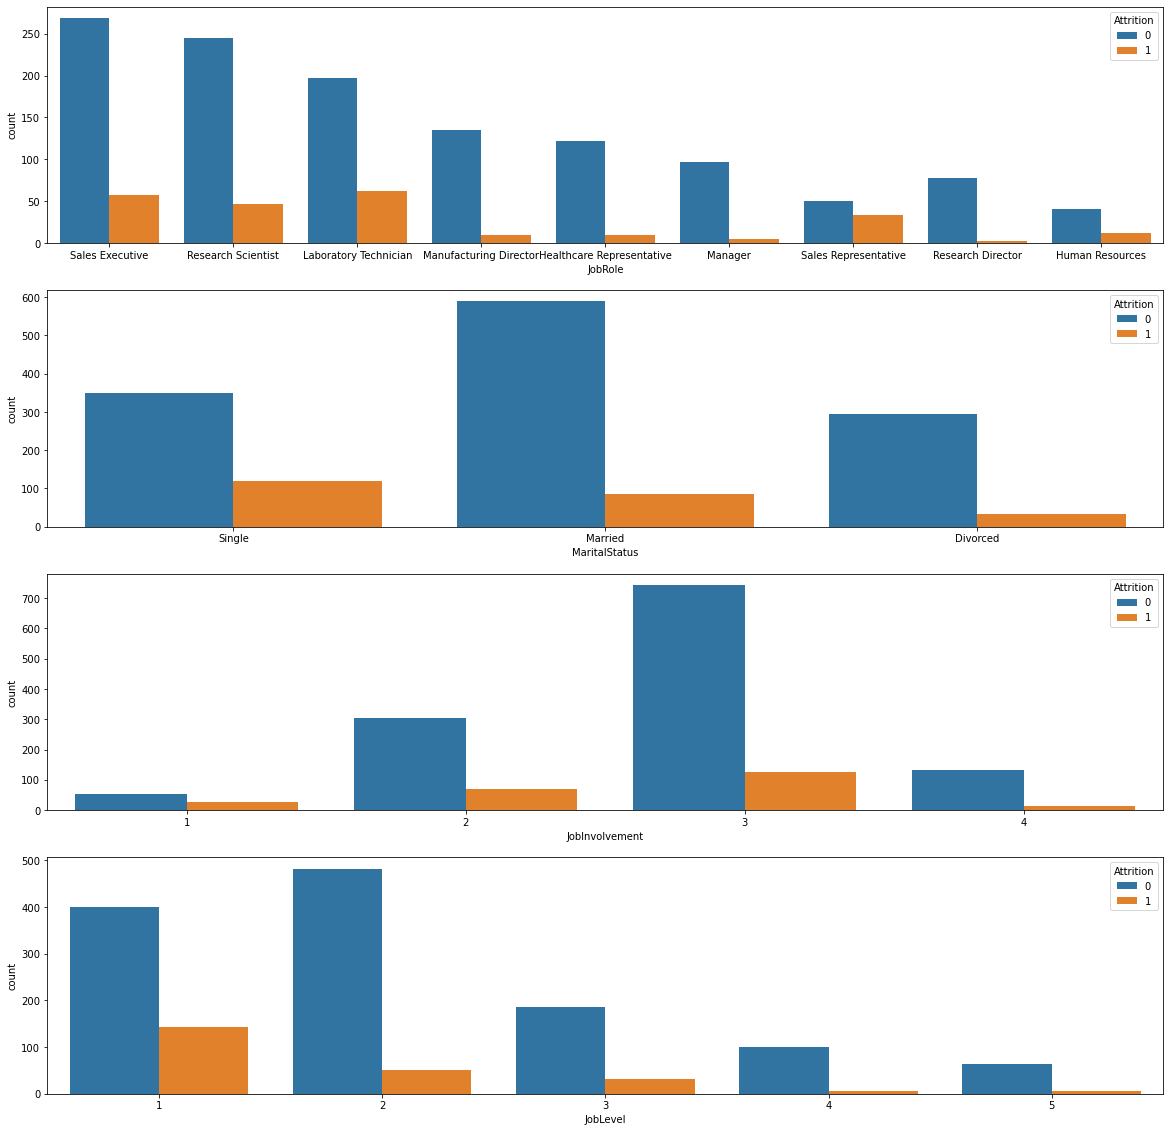

In [27]:
# Imprimindo mais algumas relações ao "sentimento de saída"
# '441' --> Como se fosse uma Matriz. 
#       --> Indicam 4 linhas (4 gráficos); 1 coluna; 1 id do gráfico
plt.figure(figsize = [20,20])

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = db_funcionarios);
# --------------------------------------------------------------------------

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = db_funcionarios);
# --------------------------------------------------------------------------

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = db_funcionarios);
# --------------------------------------------------------------------------

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = db_funcionarios);

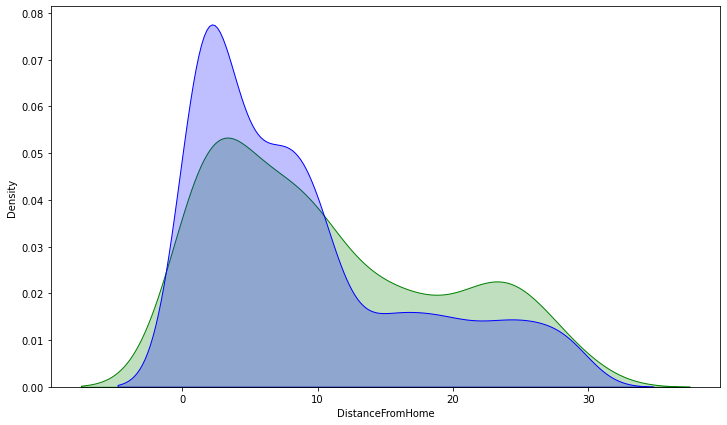

In [28]:
# imprimindo outros graficos
# Gráfico de Densidade numérica
plt.figure(figsize = (12,7))
sns.kdeplot(db_sairam['DistanceFromHome'], label = "Funcionaram que saíram", shade = True, color = 'g');
sns.kdeplot(db_ficaram['DistanceFromHome'], label = "Funcionaram que saíram", shade = True, color = 'b');

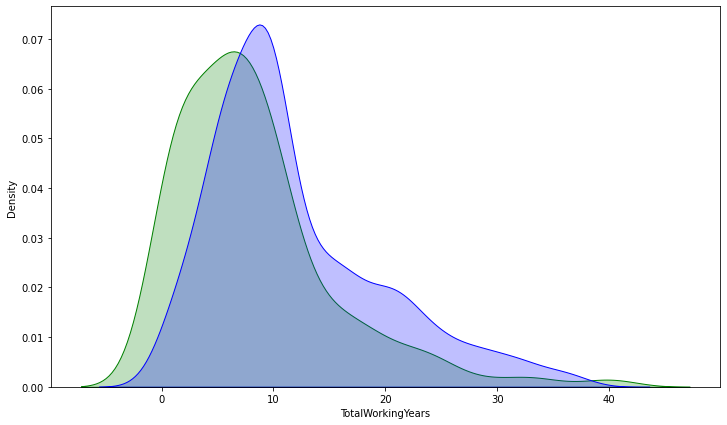

In [29]:
plt.figure(figsize = (12,7))
sns.kdeplot(db_sairam['TotalWorkingYears'], label = "Funcionaram que saíram", shade = True, color = 'g');
sns.kdeplot(db_ficaram['TotalWorkingYears'], label = "Funcionaram que saíram", shade = True, color = 'b');

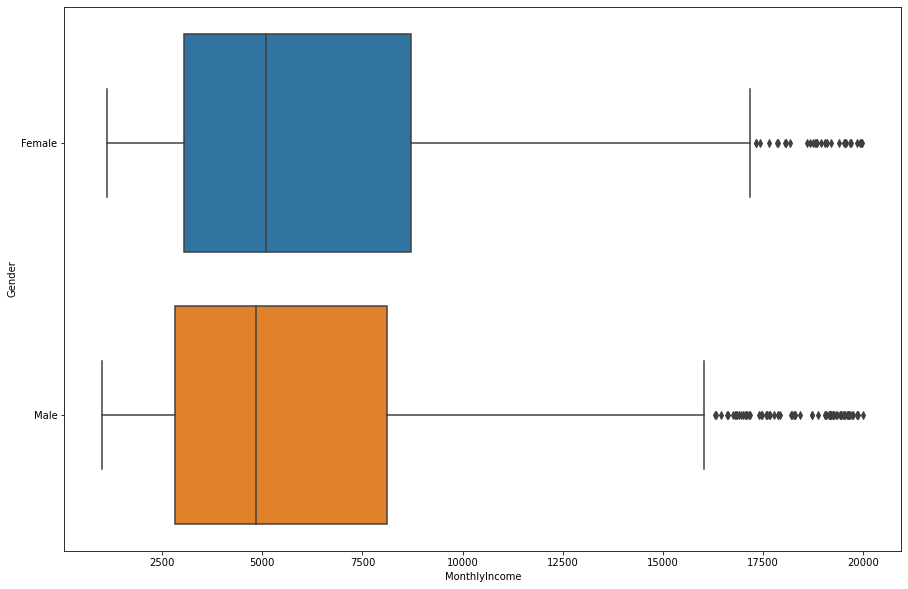

In [30]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = db_funcionarios);

C:\Users\zerom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


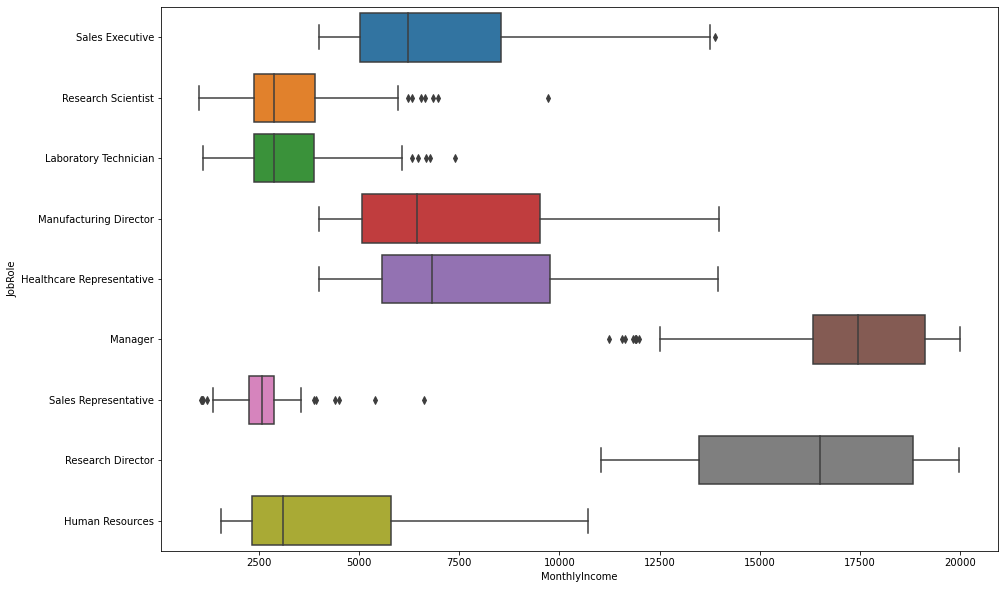

In [31]:
plt.figure(figsize = (15,10))
sns.boxplot('MonthlyIncome', y = 'JobRole', data =db_funcionarios);

## Pré-processamento e bases de Treinamentos/testes

In [32]:
# Visualizando a base de dados e analsando as caracteristicas
# para treinamento de IA
db_funcionarios.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [33]:
# Gerando um novo bd so com as categorias strings (categoricas)
X_categoricos = db_funcionarios[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [34]:
X_categoricos

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [35]:
# Mudando as categoria dos valores de categóricos (strings) para valores numéricos (int)
#Transformando as variaveis tipo categoricas, em Variáveis tipo Dummy

# Male Female
# 1    0
# 0    1
# Single Married Divorced
# 1      0       0
# 0      1       0
# 0      0       1
from sklearn.preprocessing import OneHotEncoder
onehoteconder = OneHotEncoder()
X_categoricos = onehoteconder.fit_transform(X_categoricos).toarray()

In [36]:
X_categoricos.shape

(1470, 26)

In [37]:
type(X_categoricos)

numpy.ndarray

In [38]:
# Transformando de volta para um Frame do Pandas
X_categoricos = pd.DataFrame(X_categoricos)
type(X_categoricos)

pandas.core.frame.DataFrame

In [39]:
X_categoricos

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
# Transformar (criar um novo) toda a base de dados em formato Dammy
X_numerico = db_funcionarios[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
X_numerico

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [41]:
# Vamos concatenar o X_categoricos + X_numerico
X_completo = pd.concat([X_categoricos, X_numerico], axis = 1)
X_completo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [42]:
# Como ha flutuação no valor das categorias, o algoritimo pode entender
# que um numero maior qque o outro pode ser mais importante
# sendo assim vamos transforma todos os "números" valores proximos
# nova base vai se chamar X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_completo)
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [43]:
# Como queremos medir o "sentimento de saída" vamos treinar
# com a coluna 'Attrition'
y = db_funcionarios['Attrition']

In [44]:
# Transformar a base de dados em Base Teste e Base TReinamento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [45]:
X_train.shape, y_train

((1102, 50),
 1127    0
 1331    0
 1326    1
 658     0
 1225    0
        ..
 716     0
 348     0
 1081    0
 1408    0
 1203    0
 Name: Attrition, Length: 1102, dtype: int64)

In [46]:
X_test.shape, y_test

((368, 50),
 169    0
 345    0
 50     1
 533    0
 925    0
       ..
 576    0
 605    0
 534    0
 240    0
 284    0
 Name: Attrition, Length: 368, dtype: int64)

### Regressão Logística

In [47]:
from sklearn.linear_model import LogisticRegression
logistica = LogisticRegression()

# criando uma variavel para nosso modelo de previsão
logistica.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_predicao = logistica.predict(X_test)
y_predicao

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [49]:
y_test

169    0
345    0
50     1
533    0
925    0
      ..
576    0
605    0
534    0
240    0
284    0
Name: Attrition, Length: 368, dtype: int64

In [50]:
# Vamos agora o calculo da Acuracia dos treinamentos
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicao)

0.8777173913043478

In [51]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_predicao)
matriz_confusao

array([[298,  10],
       [ 35,  25]], dtype=int64)

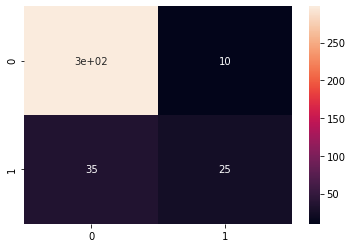

In [52]:
sns.heatmap(matriz_confusao, annot=True);

In [53]:
# Fazendo calculos manuais para o modelo
# fórmula vide o material de estudos
# Precision
precision = 22 / (22 + 7)

# Recall
recall = 22 / (22 + 31)

print("Precissão em: {:4f}".format(precision))
print("  Chamada em: {:4f}".format(recall))

Precissão em: 0.758621
  Chamada em: 0.415094


In [54]:
# Fazendo os mesmos caulos acima, só que usando o Sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
precision_score(y_test, y_predicao)

0.7142857142857143

In [55]:
recall_score(y_test, y_predicao)

0.4166666666666667

In [56]:
# Encontrando uma metrica para toda a base de dados
# ele organizar e fazer uma metrica ultilizando o Precision e o Recall 
f1_score(y_test, y_predicao, average = 'macro')

0.7280564906806799

In [57]:
# uma nova metrica
classification_report(y_test, y_predicao)

'              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.93       308\n           1       0.71      0.42      0.53        60\n\n    accuracy                           0.88       368\n   macro avg       0.80      0.69      0.73       368\nweighted avg       0.87      0.88      0.86       368\n'

In [58]:
# melhorando a visualização
print(classification_report(y_test, y_predicao))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       308
           1       0.71      0.42      0.53        60

    accuracy                           0.88       368
   macro avg       0.80      0.69      0.73       368
weighted avg       0.87      0.88      0.86       368



## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier()

In [60]:
floresta.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_predicao = floresta.predict(X_test)

In [62]:
y_predicao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
accuracy_score(y_test, y_predicao)

0.8532608695652174

In [65]:
matriz_confusao = confusion_matrix(y_predicao, y_test)
matriz_confusao

array([[307,  53],
       [  1,   7]], dtype=int64)

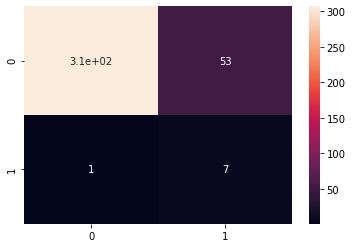

In [67]:
sns.heatmap(matriz_confusao, annot=True);

In [68]:
print(classification_report(y_test, y_predicao))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       308
           1       0.88      0.12      0.21        60

    accuracy                           0.85       368
   macro avg       0.86      0.56      0.56       368
weighted avg       0.86      0.85      0.80       368



## Redes Neurais artificiais
#### Quantos neurônios e quantas camadas? https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/

In [76]:
# Usando o TensorFlow 
import tensorflow as tf

In [70]:
X_train.shape

(1102, 50)

In [78]:
# Definindo a aquantidade para nossa rede
# (nº entradas + nº de saídas) / 2
# nº entradas = ao n] de atributos --> X_train.shape = 50
# nº de saida é igual ao nº de classes, aqui so temos 1. Se o funcionario vai sair ou não
neuronio =  (50 + 1) / 2
print(" o Nº de neuronio para nosso teste é: ",neuronio)

 o Nº de neuronio para nosso teste é:  25.5


In [79]:
# Definindo uma rede neural

# Classe para definir uma rede neural
rede_neural = tf.keras.models.Sequential()

# Add novas camadas a rede
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [80]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [81]:
rede_neural.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# treinando a rede neural
rede_neural.fit(X_train, y_train, epochs = 200)

Epoch 1/200
35/35 [==============================] - 2s 3ms/step - loss: 0.6759 - accuracy: 0.5411
Epoch 2/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.8178
Epoch 3/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8277
Epoch 4/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8384
Epoch 5/200
35/35 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8352
Epoch 6/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8384
Epoch 7/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8552
Epoch 8/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8795
Epoch 9/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.8740
Epoch 10/200
35/35 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8875
Epoch 11/

35/35 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9937
Epoch 84/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9979
Epoch 85/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9993
Epoch 86/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9938
Epoch 87/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9982
Epoch 88/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9993
Epoch 89/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9962
Epoch 90/200
35/35 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9944
Epoch 91/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9965
Epoch 92/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9968
Epoch 93/200


35/35 [==============================] - 0s 1ms/step - loss: 4.4320e-04 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 1ms/step - loss: 4.1781e-04 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 1ms/step - loss: 3.9984e-04 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 1ms/step - loss: 4.5850e-04 - accuracy: 1.0000
Epoch 167/200
35/35 [==============================] - 0s 1ms/step - loss: 3.7874e-04 - accuracy: 1.0000
Epoch 168/200
35/35 [==============================] - 0s 1ms/step - loss: 3.1391e-04 - accuracy: 1.0000
Epoch 169/200
35/35 [==============================] - 0s 1ms/step - loss: 5.1424e-04 - accuracy: 1.0000
Epoch 170/200
35/35 [==============================] - 0s 1ms/step - loss: 4.0089e-04 - accuracy: 1.0000
Epoch 171/200
35/35 [==============================] - 0s 1ms/step - loss: 2.5746e-04 - accuracy: 1.0000
Epoch 172/200
35/35 [==============================] - 0s 1ms/step - 

In [82]:
y_predicao = rede_neural.predict(X_test)
y_predicao

array([[4.93515344e-08],
       [2.74374978e-14],
       [9.55756903e-01],
       [6.31433750e-06],
       [4.31972221e-13],
       [1.72658872e-07],
       [5.05722983e-06],
       [2.59532368e-10],
       [1.08813496e-11],
       [8.45333517e-01],
       [4.86503156e-15],
       [7.78879681e-08],
       [3.57524002e-08],
       [2.91679983e-13],
       [5.34781108e-11],
       [2.72860277e-08],
       [1.00000000e+00],
       [4.19595308e-05],
       [7.46702821e-17],
       [1.18675403e-09],
       [1.55740976e-03],
       [2.39043416e-08],
       [7.35193496e-17],
       [1.21859578e-10],
       [1.11240858e-07],
       [3.11550674e-09],
       [1.00382314e-09],
       [1.00000000e+00],
       [3.30452004e-08],
       [4.57172655e-09],
       [2.39786679e-13],
       [8.94914143e-10],
       [7.04202652e-02],
       [1.06612372e-08],
       [6.57232220e-20],
       [1.00000000e+00],
       [4.82080997e-09],
       [5.89222952e-14],
       [2.27298997e-08],
       [1.00000000e+00],


In [84]:
# Transformando os valores para o padrão e geral a Matriz de Confusão
y_predicao = (y_predicao >= 0.5)
y_predicao

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [85]:
matriz_confusaor = confusion_matrix(y_test, y_predicao)
matriz_confusao

array([[307,  53],
       [  1,   7]], dtype=int64)

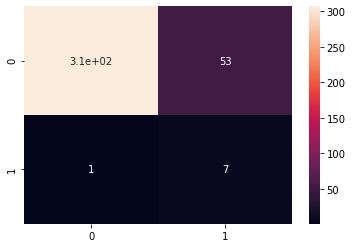

In [86]:
sns.heatmap(matriz_confusao, annot = True);

In [87]:
print(classification_report(y_test, y_predicao))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       308
           1       0.43      0.43      0.43        60

    accuracy                           0.81       368
   macro avg       0.66      0.66      0.66       368
weighted avg       0.81      0.81      0.81       368



## Salva o classificador

In [88]:
# biblioteca para salvar variáveis
import pickle

In [91]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehoteconder, logistica], f)

In [93]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [94]:
# Buscando o 1 registro do bando de dados [0:1]
X_novo = db_funcionarios.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


In [101]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [102]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [103]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [98]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [105]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [106]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [107]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5


In [108]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5


In [109]:
X_novo = min_max.transform(X_all_novo)
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [110]:
model.predict(X_novo)

array([1], dtype=int64)

In [111]:
model.predict_proba(X_novo)

array([[0.29103662, 0.70896338]])

In [112]:
model.classes_

array([0, 1], dtype=int64)